# Visualisation

## Motivation

### Visualization involves in every step of the data science pipeline
- Using visulization to convice the value of a business problem
- Using visulization to conduct exploratory and explanatory analysis
- Using visulization to evaluate a model
- Using visulization to monitor a model after deployment

### Summary statistics can be misleading or disguise some information
- A correlation coefficient cannot show the type of relationship between two variables: e.g. quadratic v.s. linear relationship
- Mean and standard deviation cannot display all aspects of the distribution of a variable: e.g. outlier, threshold, mode

### Visulization can tell far more information than a table
- visulization can show relationshipo between two variables
- visulization can show difference in mean of a value / distribution of the value / relationship between two values by groups
- all of these can be combined into one graph 

### Visulization allows us to quickly identify problems in data
- e.g. visulization allows us to quickly identify the impact of a treatment on various variables
- e.g. visulization allows us to identify weried pattern in distribution that have strong realistic implication; for example, the mode of score distribution is the minium pass score, this is consistent with students close to passing having their scores bumped up

Visulization allows us to communicat result effectively
- use interative plot to allow stakeholders better understand variation in data through different dimensions
- use animated plot to illustrate dynamics of relationshipws between two or more variables

## Best Practices

### Show your data in the way that is most obvious
- for example, for comparision of data between two groups, plot dispensation of data point + mean + std, rather than a box plot of mean + std
- the above practice is better when we have limited observatiosn for each group (not a good practice with a lot of observations)

### Be accurate
- label of x and y axis
- add unit for x and y axis
- a title
- label data directly and avoid legends
- use colour to set things apart
- reduce the dimension to the necessary

### Sort by the variable in question
- e.g. for a bar chart of muder rate by country
- sort by muder rate rather than country name

### Do not mislead
- When comparing data using propotion grpah, illustrate the data poiint using area rather than radius of the plot
- For most cases include a zero for bar chart; do not include a zero if you know the variable = 0 is impossible and do not provide much information; do not include zero if you also plot the distrubution of data points vertically (if you care distribution by group)

### Use log and difference carefully
- Use log scale when ploting expotential growth can make growth trend more clearly
- Use log scale if it can illustrate different between groups more clearly

### Choose the right plot
- e.g. to compare two distributions, put two historgams vertically together
- a guideline: https://datavizblog.com/2013/04/29/andrew-abelas-chart-chooser/
- in most cases, scatter plot, bar, histogram are enough; never use 3D grpahs

## PLotting Libraries

Matplotlib + Seaborn + Plotly (interactive graph) + Altair (interactive graph)

Matplotlib:

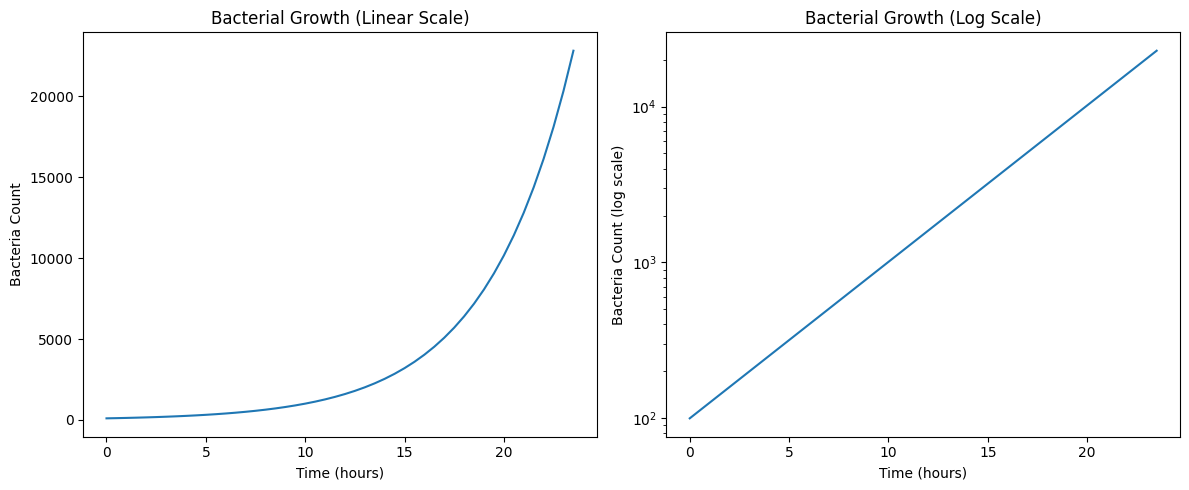

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
time = np.arange(0, 24, 0.5)
bacteria_count = 100 * 2**(time/3)   # Exponential growth model

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear scale plot
ax1.plot(time, bacteria_count)
ax1.set_title('Bacterial Growth (Linear Scale)')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Bacteria Count')

# Log scale plot
ax2.plot(time, bacteria_count)
ax2.set_yscale('log')
ax2.set_title('Bacterial Growth (Log Scale)')
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Bacteria Count (log scale)')

plt.tight_layout()
plt.show()

Seaborn

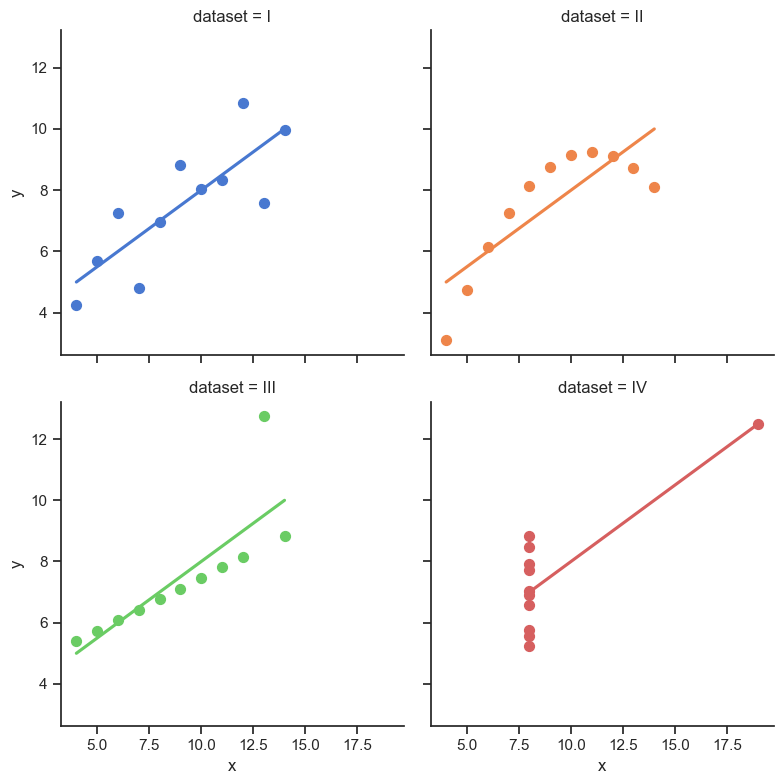

In [4]:
import seaborn as sns

# Set the visual theme
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)


## Explanatory vs Exploratory Analysis

* **Exploratory data analysis:**
    * A private talk with the data
    * Find out what features we have how they distributed
    * Just make sure we really look at the data + prediction performance
    * Less importance on best-practices
    
* **Explanatory data analysis:**
    * Pick / reformulate important plots from exploratory analysis that generates insights
    * e.g. this visulization informs feature choice
    * Need to decide whether this visulization is important for my audience, which depends on the data challenge / business question is answering
    * Evaluate whether inclusion of this visulization help me to show the whole picture
    * Importance of best-practices
    * Every grpah in the report should be explained; make sure to explain everything look odd

### Exploratory data analysis: some tips

To get a quick feeling for a variable, use histogram to check: range of values, mean, standard deviation, outliers (should I include or exclude outliers?)
- Answer the question at this sateg: can I trust the data? are there values I did not expect? 
- e.g. someone is only 5 cm small or 8 meters tall

Use scatter plots to get a feeling for correlations
- Find subset of features relevant for prediction
- We can also do this for boolean variables (check if different group have different distribution + mean of the target, also check if groupping is balanced, and if there is variation at all)

Use box plot by group + by time to understand changes

Exploratroy analysis after prediction:
- have prediction, target, and features in one table
- count true of false (or prediction accurary metric) for each observation
- use explorartoy analysis to understand why model make mistake / performance across groups / check if there exists a feature we forgot to include that can be quite helpful for precition on specific group (e.g. gender must be a important feature for predicting sales of a pregancy product)
- visulize feature importance for prediction

## Interpretation of result
- Evaluate the prediction performance of a model not only through accuracy metrics, but also the implications behind these metrics.
- One good practice is, when the traget is in monetary value, always denotes the unit when reporting accuracy metrics that is in abolsute scale relative to the target variable (e.g. MAE is what amount of dollars, Root Mean Squared Error in what amount of dollar).
- Another good practice is, also report the accuracy of prediction of mean (e.g. MAE/true mean which is equal to (predicted mean - true mean) / true mean), prediction of mean by groups, prediction of ranking etc.
- This can shed some lights on where the prediction can be useful: a high MAE indicate the limitation of our model at unit-level prediction (e.g. predict price of a house unit), but a high accuracy of mean prediction (or mean prediction by groups) might indicate that our model is useful in predicting average house price for a district or neighbourhood.

## Path Manipulation

- For best practices, paths are setup in a ”computer” agnostic way; so that regardless to where we execute the scripts of the data pipeline, the code should work
- This can be achieved in Python using the Pathlib package

Pathlib is a Python package (comes directly with Python) that helps:
- Easy path manipulation (parent directories, file name, suffix)
- Resolving relative paths to absolute paths
- Cross OS compatibility (Mac, Windows)

In [ ]:
import pandas as pd

# Suppose we have a code:
df = pd.read_csv("/Users/yuhaohuo/Desktop/code/ds_class/ds_notes/example_database/csv/common_player_info.csv")

# To make it agnostic, we should use:
from pathlib import Path
path = Path(__file__).parent/"ds_notes"/ "example_database" /"csv" / "game.csv" 
# note, __file__ is defined only in a py file, hence this code cell will not work in juypter notebook
print(path)
df = pd.read_csv(path)